In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn.linear_model import LogisticRegression

In [108]:
#### Read in dataset from source
lm = LogisticRegression()
df = pd.read_csv("icrowdfundingdatafinal.csv")
print df.head()

   Success  CFP_Strength  Security_Type_Class  Gender  Target_Raise  \
0        0             3                    3       0        400000   
1        0             3                    3       1         50000   
2        0             3                    1       0       1500000   
3        0             3                    3       1        100000   
4        0             3                    3       0         10000   

   Total_Raised  Pre_Issue_Market_Cap  
0        150000              10000000  
1             0                     0  
2        485822               5000000  
3             0                666000  
4             0                     0  


In [109]:
#### Data Dictionary:

In [110]:
#### Variable

In [111]:
#### Success

In [112]:
#### Description Success Reaching Target Raise - 0 = not successful 1 = successful

In [113]:
#### Type of Variable - Categorical

In [114]:
#### Variable

In [115]:
#### CFP_Strength

In [116]:
#### Description Industry Leading Portal - 1 = high strength 2 = good strength 3 = low strength 4 = no strength

In [117]:
#### Type of Variable - Categorical

In [118]:
#### Variable

In [119]:
#### Security_Type_Class

In [120]:
#### Description Security Type Category - 1 = Convertible Debt 2 = Debt 3 = Equity 4 = Real Estate 5 = Revenue Share / Royalty 6 = Safe 

In [121]:
#### Type of Variable - Categorical

In [122]:
#### Variable

In [123]:
#### Gender

In [124]:
#### Description Women_Led_PIPR / Deal - 1 = female 0 = male

In [125]:
#### Type of Variable - Categorical

In [126]:
#### Variable

In [127]:
#### Target_Raise

In [128]:
#### Description Investment Crowdfunding Target Raise

In [129]:
#### Type of Variable - Continuous

In [130]:
#### Variable

In [131]:
#### Total_Raised

In [132]:
#### Description Investment Crowdfunding Total Raised

In [133]:
#### Type of Variable - Continuous

In [134]:
#### Variable

In [135]:
#### Pre_Issue_Market_Cap

In [136]:
#### Description Investment Pre Issue Market Cap

In [137]:
#### Type of Variable - Continuous

In [138]:
#### Exploratory Analysis:

In [139]:
#### Overall Crowdfunding Success
df.Success.value_counts()

0    2906
1     114
Name: Success, dtype: int64

In [140]:
114/(114.0+2906.0)

0.03774834437086093

In [141]:
#### EDA of continuous values in dataset

In [142]:
df.describe()

,Success,CFP_Strength,Security_Type_Class,Gender,Target_Raise,Total_Raised,Pre_Issue_Market_Cap
count,3020.000000,3020.000000,3020.000000,3020.000000,3.020000e+03,3.020000e+03,3.020000e+03
mean,0.037748,2.948675,2.457947,0.207616,2.590084e+06,2.485364e+05,3.664900e+06
std,0.190619,0.232392,0.929737,0.405667,4.103632e+07,1.268762e+06,4.202616e+07
min,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,3.000000,1.000000,0.000000,2.500000e+05,0.000000e+00,0.000000e+00
50%,0.000000,3.000000,3.000000,0.000000,5.000000e+05,0.000000e+00,0.000000e+00
75%,0.000000,3.000000,3.000000,0.000000,1.000000e+06,1.100000e+05,3.000000e+06
max,1.000000,3.000000,6.000000,1.000000,2.150000e+09,3.800000e+07,2.147484e+09


In [143]:
#### Distribution of each variable

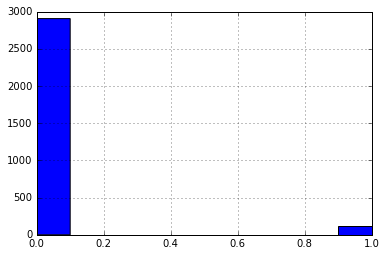

In [144]:
df['Success'].hist()
pl.show()

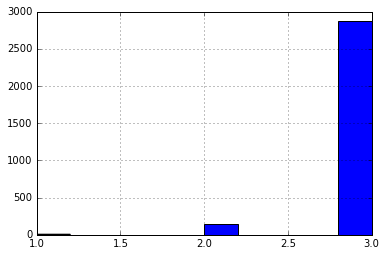

In [145]:
df['CFP_Strength'].hist()
pl.show()

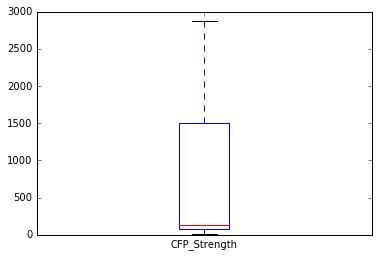

In [146]:
df.CFP_Strength.value_counts().plot(kind='box')

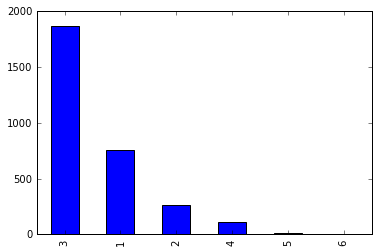

In [147]:
df.Security_Type_Class.value_counts().plot(kind='bar')

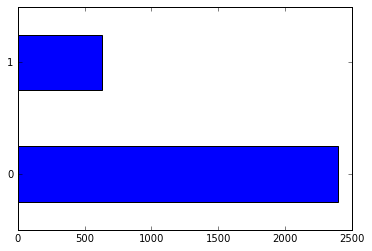

In [148]:
df.Gender.value_counts().plot(kind='barh')

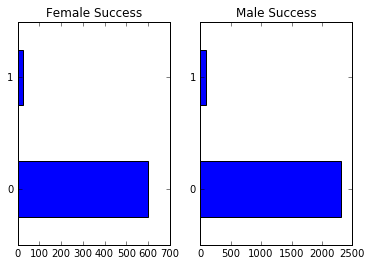

In [149]:
fig, axs = plt.subplots(1,2)
df[df.Gender==1].Success.value_counts().plot(kind='barh' ,ax=axs[0], title="Female Success")
df[df.Gender==0].Success.value_counts().plot(kind='barh' ,ax=axs[1], title="Male Success")

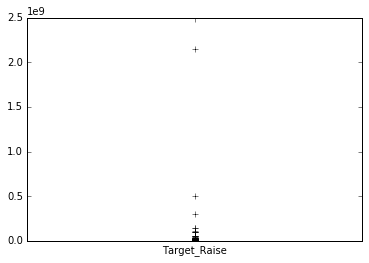

In [150]:
df['Target_Raise'].plot(kind='box')

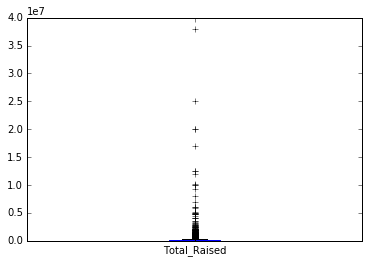

In [151]:
df['Total_Raised'].plot(kind='box')

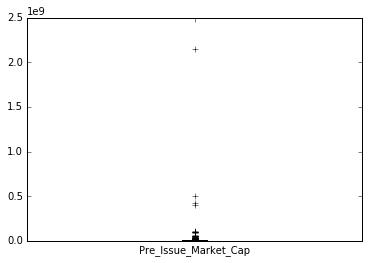

In [152]:
df['Pre_Issue_Market_Cap'].plot(kind='box')

In [153]:
#### Check for null values

In [154]:
df[df.Target_Raise.isnull()]

,Success,CFP_Strength,Security_Type_Class,Gender,Target_Raise,Total_Raised,Pre_Issue_Market_Cap


In [155]:
df[df.Total_Raised.isnull()]

,Success,CFP_Strength,Security_Type_Class,Gender,Target_Raise,Total_Raised,Pre_Issue_Market_Cap


In [156]:
df[df.Pre_Issue_Market_Cap.isnull()]

,Success,CFP_Strength,Security_Type_Class,Gender,Target_Raise,Total_Raised,Pre_Issue_Market_Cap


In [157]:
df.corr()

,Success,CFP_Strength,Security_Type_Class,Gender,Target_Raise,Total_Raised,Pre_Issue_Market_Cap
Success,1.000000,-0.360029,-0.024682,0.009988,-0.007874,0.165163,-0.002731
CFP_Strength,-0.360029,1.000000,-0.130337,0.021715,0.011310,-0.038625,0.016047
Security_Type_Class,-0.024682,-0.130337,1.000000,-0.007142,0.017434,0.018345,-0.020087
Gender,0.009988,0.021715,-0.007142,1.000000,-0.012525,-0.025614,-0.008439
Target_Raise,-0.007874,0.011310,0.017434,-0.012525,1.000000,0.038910,0.012049
Total_Raised,0.165163,-0.038625,0.018345,-0.025614,0.038910,1.000000,-0.005256
Pre_Issue_Market_Cap,-0.002731,0.016047,-0.020087,-0.008439,0.012049,-0.005256,1.000000


In [158]:
#### Frequency Tables

In [159]:
print pd.crosstab(df['Success'], df['CFP_Strength'], rownames=['Success'])

CFP_Strength  1   2     3
Success                  
0             2  97  2807
1             6  42    66


In [160]:
#### Dummy variables

In [161]:
dummy_ranks = pd.get_dummies(df['CFP_Strength'], prefix='CFP_Strength')
print dummy_ranks.head()

   CFP_Strength_1  CFP_Strength_2  CFP_Strength_3
0             0.0             0.0             1.0
1             0.0             0.0             1.0
2             0.0             0.0             1.0
3             0.0             0.0             1.0
4             0.0             0.0             1.0


In [162]:
#### Odds Ratios

In [163]:
cols_to_keep = ['Success','Total_Raised','Pre_Issue_Market_Cap']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'CFP_Strength_1':])
print handCalc.head()

   Success  Total_Raised  Pre_Issue_Market_Cap  CFP_Strength_1  \
0        0        150000              10000000             0.0   
1        0             0                     0             0.0   
2        0        485822               5000000             0.0   
3        0             0                666000             0.0   
4        0             0                     0             0.0   

   CFP_Strength_2  CFP_Strength_3  
0             0.0             1.0  
1             0.0             1.0  
2             0.0             1.0  
3             0.0             1.0  
4             0.0             1.0  


In [164]:
#### Crosstab CFP_Strength_1 Success

In [165]:
#### Frequency Table cutting CFP_Strength_1 and whether or not company was successful reaching target raise

In [166]:
print pd.crosstab(handCalc['Success'], handCalc['CFP_Strength_1'], rownames=['Success'])

CFP_Strength_1   0.0  1.0
Success                  
0               2904    2
1                108    6


In [167]:
#### Odds of successfully reaching target raise if company used an industry leading platform (CFP_Strength_1)

In [168]:
odds_exposed = 6.0/2.0
odds_exposed

3.0

In [169]:
#### Calculate odds of success if company used an industry leading platform

In [170]:
odd_unexp = 108.0/2904.0
odd_unexp

0.0371900826446281

In [171]:
#### Calcualte the odds ratio

In [172]:
OR = odds_exposed/odd_unexp
OR

80.66666666666667

In [173]:
#### For companies that used an industry leading platform (CFP_Strength_1) the odds of successfully reaching target raise are 81 times the odds of companies who did not use an industry leading platform

In [174]:
#### Crosstab CFP_Strength_3 Success

In [175]:
#### Frequency Table cutting CFP_Strength_3 and whether or not company was successful reaching target raise

In [176]:
print pd.crosstab(handCalc['Success'], handCalc['CFP_Strength_3'], rownames=['Success'])

CFP_Strength_3  0.0   1.0
Success                  
0                99  2807
1                48    66


In [177]:
#### Odds of successfully reaching target raise if company does not use an industry leading platform

In [178]:
OR = (66.0*99.0)/(48*2807)
print OR

0.0484948343427


In [179]:
print .0489-1

-0.9511


In [180]:
#### The odds of successfully reaching target raise are 95% lower for companies who used a non-industry leading platform compared to companies who did not use a non-industry leading platform.  In other words, for companies who used a non-industry leading platform the odds of successfully reaching target raise are .0489 times the odds of companies who did not use a non-industry leading platform (Strength_1). 

In [181]:
#### Create a clean data frame for the regression

In [182]:
cols_to_keep = ['Success','Total_Raised','Pre_Issue_Market_Cap']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'CFP_Strength_1':])
print data.head()

   Success  Total_Raised  Pre_Issue_Market_Cap  CFP_Strength_1  \
0        0        150000              10000000             0.0   
1        0             0                     0             0.0   
2        0        485822               5000000             0.0   
3        0             0                666000             0.0   
4        0             0                     0             0.0   

   CFP_Strength_2  CFP_Strength_3  
0             0.0             1.0  
1             0.0             1.0  
2             0.0             1.0  
3             0.0             1.0  
4             0.0             1.0  


In [183]:
#### Manually add the intercept

In [184]:
data['intercept'] = 1.0

In [185]:
#### Set the covariates to a variable called train_cols

In [186]:
train_cols = data.columns[1:]
#### Index([Total_Raised, Pre_Issue_Market_Cap, CFP_Strength_1, CFP_Strength_2, CFP_Strength_3], dtype=object)

In [187]:
#### Fit the model

In [188]:
logit = sm.Logit(data['Success'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.129138
         Iterations 8


In [189]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                Success   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3015
Method:                           MLE   Df Model:                            4
Date:                Thu, 11 Aug 2016   Pseudo R-squ.:                  0.1965
Time:                        13:13:51   Log-Likelihood:                -390.00
converged:                       True   LL-Null:                       -485.38
                                        LLR p-value:                 3.639e-40
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Total_Raised          2.206e-07   4.41e-08      5.007      0.000      1.34e-07  3.07e-07
Pre_Issue_Market_Cap  4.882e-10   1.96e-09      0.249      0.803     -3.35e-09  4.33e-09
CFP_Strength

In [83]:
#### Calculate the odds ratio of the coefficients and their 95% CI intervals

In [84]:
print np.exp(result.params)

Total_Raised            1.000000
Pre_Issue_Market_Cap    1.000000
CFP_Strength_1          6.086021
CFP_Strength_2          1.078055
CFP_Strength_3          0.056262
intercept               0.369137
dtype: float64


In [85]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5', '97.5', 'OR']
print np.exp(conf)

                      2.5  97.5        OR
Total_Raised          1.0   1.0  1.000000
Pre_Issue_Market_Cap  1.0   1.0  1.000000
CFP_Strength_1        NaN   NaN  6.086021
CFP_Strength_2        NaN   NaN  1.078055
CFP_Strength_3        NaN   NaN  0.056262
intercept             NaN   NaN  0.369137


In [86]:
#### Companies who used an average platform (CFP_Strength_2) had 1.07 times the odds of successfully reaching target raise compared to companies who used a non-industry leading platform (CFP_Strength_1). 

In [87]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [94]:
# instead of generating all possible values of Total Raised and Pre_Issue_Market_Cap, we're going
# to use an evenly spaced range of 10 values from the min to the max 
Total_Raised_Amounts = np.linspace(data['Total_Raised'].min(), data['Total_Raised'].max(), 10)
print Total_Raised_Amounts
Pre_Issue_Market_Caps = np.linspace(data['Pre_Issue_Market_Cap'].min(), data['Pre_Issue_Market_Cap'].max(), 10)
print Pre_Issue_Market_Caps
combos = pd.DataFrame(cartesian([Total_Raised_Amounts, Pre_Issue_Market_Caps, [1, 2, 3, 4], [1.]]))

[        0.           4222222.22222222   8444444.44444444
  12666666.66666667  16888888.88888889  21111111.11111111
  25333333.33333333  29555555.55555555  33777777.77777778  38000000.        ]
[  0.00000000e+00   2.38609294e+08   4.77218588e+08   7.15827882e+08
   9.54437176e+08   1.19304647e+09   1.43165576e+09   1.67026506e+09
   1.90887435e+09   2.14748365e+09]


In [95]:
# Recreate the dummy variables

In [100]:
combos.columns = ['Total_Raised', 'Pre_Issue_Market_Cap', 'CFP_Strength', 'intercept']
dummy_ranks = pd.get_dummies(combos['CFP_Strength'], prefix='CFP_Strength')
dummy_ranks.columns = ['CFP_Strength_1', 'CFP_Strength_2', 'CFP_Strength_3', 'CFP_Strength_4']
cols_to_keep = ['Total_Raised', 'Pre_Issue_Market_Cap', 'CFP_Strength', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'CFP_Strength_1':])

In [101]:
#### Make predictions on the enumerated dataset

In [102]:
combos['Success_pred'] = result.predict(combos[train_cols])
print combos.tail()
len(combos)

     Total_Raised  Pre_Issue_Market_Cap  CFP_Strength  intercept  \
395    38000000.0          1.908874e+09           4.0        1.0   
396    38000000.0          2.147484e+09           1.0        1.0   
397    38000000.0          2.147484e+09           2.0        1.0   
398    38000000.0          2.147484e+09           3.0        1.0   
399    38000000.0          2.147484e+09           4.0        1.0   

     CFP_Strength_1  CFP_Strength_2  CFP_Strength_3  CFP_Strength_4  \
395             0.0             0.0             0.0             1.0   
396             1.0             0.0             0.0             0.0   
397             0.0             1.0             0.0             0.0   
398             0.0             0.0             1.0             0.0   
399             0.0             0.0             0.0             1.0   

     Success_pred  
395      0.999756  
396      0.999964  
397      0.999799  
398      0.996156  
399      0.999783  


400

In [190]:
def isolate_and_plot(variable):
    grouped = pd.pivot_table(combos, values=['Success_pred'], index=[variable, 'CFP_Strength'],
    aggfunc=np.mean)

In [922]:
#### Results plot

In [ ]:
colors = 'rbgyrbgy'
for col in combos.CFP_Strength.unique():
    plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
    pl.plot(plt_data.index.get_level_values(0), plt_data['Success_pred'],
            color=colors[int(col)])
    
pl.xlabel(variable)
pl.ylabel("P(Success=1)")
pl.legend(['1', '2', '3', '4'], loc='upper left', title='CFP Strength')
pl.title("Prob(Success=1) isolating " + variable + " and CFP Strength")
pl.show()

isolate_and_plot('Total_Raised')
isolate_and_plot('Pre_Issue_Market_Cap')